In [21]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [22]:
IMAGE_SIZE = [224, 224]

In [23]:
train_directory='E:/train'
test_directory='E:/test'
val_directory='E:/valid'

In [24]:
from keras.applications import VGG16


In [25]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [26]:
import os

In [27]:
# Define data directory and classes
data_dir = 'E:/train'
classes = os.listdir(data_dir)
classes

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON']

In [28]:
from glob import glob
import os

# Use '*/' pattern to get all subdirectories in 'E:\train'
folders = glob('E:/train/*/')
num_classes = len(folders)

print("Number of classes:", num_classes)


Number of classes: 25


In [29]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [30]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [31]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4047 images belonging to 25 classes.
Found 125 images belonging to 25 classes.


In [34]:
print(len(training_set))
print(len(test_set))

127
4


In [35]:
import scipy

In [36]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
127/127 [==============================] - 697s 5s/step - loss: 1.5932 - accuracy: 0.5762 - val_loss: 0.5517 - val_accuracy: 0.8560
Epoch 2/5
127/127 [==============================] - 708s 6s/step - loss: 0.5227 - accuracy: 0.8495 - val_loss: 0.3976 - val_accuracy: 0.8400
Epoch 3/5
127/127 [==============================] - 710s 6s/step - loss: 0.2914 - accuracy: 0.9157 - val_loss: 0.3364 - val_accuracy: 0.8880
Epoch 4/5
127/127 [==============================] - 713s 6s/step - loss: 0.2604 - accuracy: 0.9202 - val_loss: 0.3070 - val_accuracy: 0.8880
Epoch 5/5
127/127 [==============================] - 717s 6s/step - loss: 0.1906 - accuracy: 0.9390 - val_loss: 0.2878 - val_accuracy: 0.9040


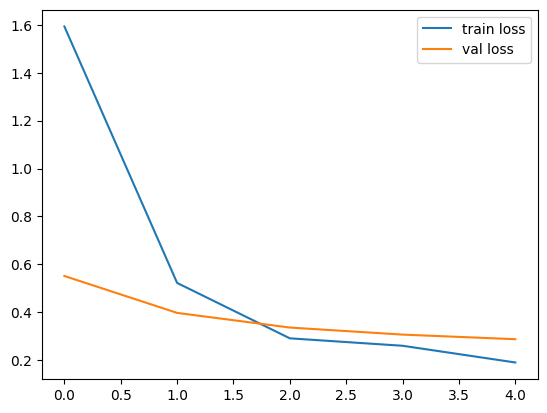

In [37]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

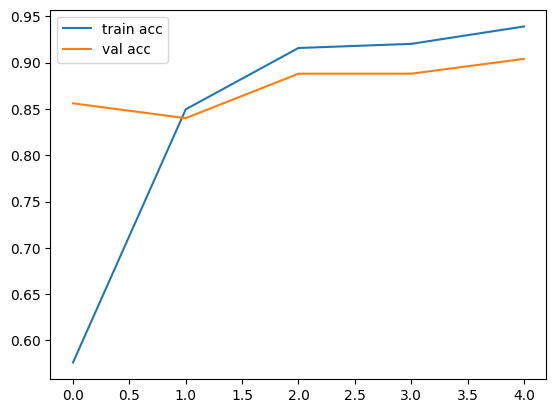

In [38]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [39]:
model.save('BC.h5')

1/1 [==============================] - 0s 331ms/step


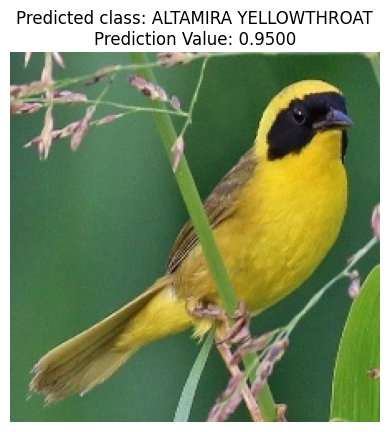

In [46]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

# Constants
IMAGE_SIZE = [224, 224]

# Load your trained model
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Function to preprocess and predict the class of an image
def predict_image(image_path):
    # Load and preprocess the selected image
    IMG_SIZE = 224  # Change this to match the input size of your model

    # Check and adjust image orientation
    img = Image.open(image_path)
    img = img.resize((IMG_SIZE, IMG_SIZE))

    # Check if the image has an orientation tag
    if hasattr(img, '_getexif') and img._getexif() is not None:
        orientation = img._getexif().get(274, 1)
        if orientation in (3, 6, 8):
            img = img.transpose(Image.ROTATE_270) if orientation == 3 else img
            img = img.transpose(Image.ROTATE_90) if orientation == 6 else img
            img = img.transpose(Image.ROTATE_180) if orientation == 8 else img

    img = np.asarray(img) / 255.0  # Normalize the pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make predictions using the model
    predictions = model.predict(img)

    # Get the predicted class
    predicted_class_index = np.argmax(predictions)
    predicted_class = classes[predicted_class_index]

    # Get the prediction value
    prediction_value = predictions[0][predicted_class_index]

    # Display the image, predicted class, and prediction value
    plt.imshow(np.squeeze(img), origin='upper')  # Add origin='upper' parameter
    plt.title(f"Predicted class: {predicted_class}\nPrediction Value: {prediction_value:.4f}")
    plt.axis('off')
    plt.show()

# Define the path to the folder containing the images you want to predict
predict_folder = 'E:/test'  # Replace with the actual path

# List the available classes (assuming the folder structure reflects class labels)
classes = os.listdir(predict_folder)

# Select a random image from a random class for prediction
class_label = np.random.choice(classes)
class_folder = os.path.join(predict_folder, class_label)
image_files = os.listdir(class_folder)
image_file = np.random.choice(image_files)
image_path = os.path.join(class_folder, image_file)

# Predict the image
predict_image(image_path)


In [42]:
from keras.preprocessing.image import ImageDataGenerator

# Specify the path to your test set
test_directory = 'E:/test'

# Create an ImageDataGenerator for the test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for the test set
test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),  # Adjust the target size according to your model
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure that the order of predictions matches the order of true labels
)

# Make predictions on the test set
predictions = model.predict(test_set, steps=len(test_set))

# Get the predicted classes for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes for each image
true_classes = test_set.classes

# Calculate the classification accuracy
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)

print(f'Classification Accuracy: {accuracy * 100:.2f}%')


Found 125 images belonging to 25 classes.


4/4 [==============================] - 14s 4s/step
Classification Accuracy: 90.40%
